<a href="https://colab.research.google.com/github/dianaguerrero513/ProyectoEU3/blob/main/PROYECTOU3_22150431.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***INTRODUCCIÓN***

En el siguiente trabajo se busca investigar, identificar y aplicar varios conceptos estadisticos obtenidos a lo largo de la segunda y tercera unidad de la materia de Estadística Inferencial como lo es el tema principal de series de tiempo y sus subtemas como lo son la estacionalidad, regresion polinomial, tendencia, residuales y descomposicion (solo por destacar algunos de los más importantes); en dos marcas que de cierta manera se relacionen entre sí, las cuales son: Krispy Kreme y Starbucks. La seleccion de dichas marcas se hizo con el objetivo principal de comparar las posibles similutudes y/o diferencias que puedan existir en su desempeño observado en Yahoo Finance a traves de las distintas métodos estadísticos empleados en el lenguaje de progración Phyton.

***MARCO TEÓRICO***

Una de las herramientas necesarias para poder ejecutar y comprender de manera adecuada cada uno de los procedimientos estadísticos que se llevarán a cabo en el presente documento es importante resaltar algunos de los conceptos por decirlo de alguna forma -de los mas relevantes- para facilitar el progreso del presente trabajo.

Las **series de tiempo** (o series temporales) son secuencias de datos observados en intervalos de tiempo y ordenados cronológicamente. Normalmente las series de tiempo se representan en gráficos para analizar la evolución temporal de los datos.
Para ejecutar el analisis de las series de tiempo es de suma importancia tener conocimiento de ciertos componentes primordiales:

**Tendencia**: se trata de la evolución a largo plazo de la serie de tiempo.

**Estacionalidad**:son movimientos a corto plazo que se repiten de manera periódica.

**Variación ciclica:**componente de la serie que recoge las oscilaciones periódicas que tienen una amplitud superior a un año.

**Variación aleatoria:** variaciones que se deben debido a fenómenos puntuales como tormentas, inundaciones, huelgas, guerras, avances tecnológicos, etc.

**Gráfico de lineas:**s un tipo de gráfico estadístico que sirve para representar gráficamente una serie temporal.

**Interpretación de un gráfico de líneas:** consiste en analizar la evolución temporal de los datos.

**Regresión polinomial:** es un modelo de regresión en el cual la relación entre la variable independiente X y la variable dependiente Y se modela mediante un polinomio.

**Test de causalidad de Granger:** es una prueba estadística empleada para determinar si una serie temporal puede predecir a otra. Para ello se basa en la idea de que si una serie temporal X causa otra Y, los modelos de Y en los que se emplean datos retrasados de X e Y deben funcionar mejor los basados únicamente en datos retrasados de Y.

**Modelo Prophet:** biblioteca de código abierto para predicción de series temporales desarrollada por Facebook. Utiliza un modelo aditivo que permite descomponer la serie temporal en tendencias estacionales, tendencias a largo plazo y efectos de días festivos.

Luego de identificar y conocer las anteriores definiciones a continuacion lo veremos aplicado en el desglose del siguiente análisis de series de tiempo.

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression # Changed 'skylearn' to 'sklearn'
from sklearn.model_selection import train_test_split # Assuming you meant 'train_test_split'
from scipy.stats import pearsonr
from statsmodels.tsa.stattools import adfuller
from numpy.polynomial.polynomial import Polynomial
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

A) Selecciona dos marcas sobre las cuales tengas la hipótesis que están relacionadas entre sí.

In [ ]:
df=yf.download(
    tickers="DNUT",
    start="2021-01-01",
    end="2024-01-01",
    interval="1d",
    group_by=None,
    auto_adjust=False,
    actions=False,
)
df

[*********************100%***********************]  1 of 1 completed


Ticker                          DNUT                                          \
Price                           Open       High    Low      Close  Adj Close   
Date                                                                           
2021-07-01 00:00:00+00:00  16.299999  21.690001  15.50  21.000000  20.300503   
2021-07-02 00:00:00+00:00  19.854000  20.450001  18.32  19.120001  18.483130   
2021-07-06 00:00:00+00:00  18.900000  19.120001  17.00  17.000000  16.433743   
2021-07-07 00:00:00+00:00  17.289000  18.160000  17.00  17.780001  17.187763   
2021-07-08 00:00:00+00:00  17.250000  18.350000  17.00  18.200001  17.593773   
...                              ...        ...    ...        ...        ...   
2023-12-22 00:00:00+00:00  15.080000  15.110000  14.94  15.020000  14.850476   
2023-12-26 00:00:00+00:00  15.010000  15.330000  14.97  15.260000  15.087768   
2023-12-27 00:00:00+00:00  15.300000  15.410000  15.22  15.410000  15.236074   
2023-12-28 00:00:00+00:00  15.310000  15.380000  15.23  15.250000  15.077879   
2023-12-29 00:00:00+00:00  15.220000  15.360000  15.09  15.090000  14.919684   

Ticker                               
Price                        Volume  
Date                                 
2021-07-01 00:00:00+00:00  40888200  
2021-07-02 00:00:00+00:00   8631400  
2021-07-06 00:00:00+00:00   3973000  
2021-07-07 00:00:00+00:00   3213500  
2021-07-08 00:00:00+00:00   5448300  
...                             ...  
2023-12-22 00:00:00+00:00    647900  
2023-12-26 00:00:00+00:00    517600  
2023-12-27 00:00:00+00:00    531200  
2023-12-28 00:00:00+00:00    421100  
2023-12-29 00:00:00+00:00    603800  

[629 rows x 6 columns]

B) Realiza un análisis de cada serie de tiempo de manera independiente (análisis basado en el examen de práctica).

In [ ]:
# Paso 1: Mover 'Date' del índice a columna regular
df = df.reset_index()

# Paso 2: Aplanar el MultiIndex de las columnas, manteniendo 'Open', 'High', etc.
df.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df.columns.values]
df['Date'] = pd.to_datetime(df['Date']) #columna "Date"

df['Date'] = df['Date'].dt.date
df.set_index('Date', inplace=True)

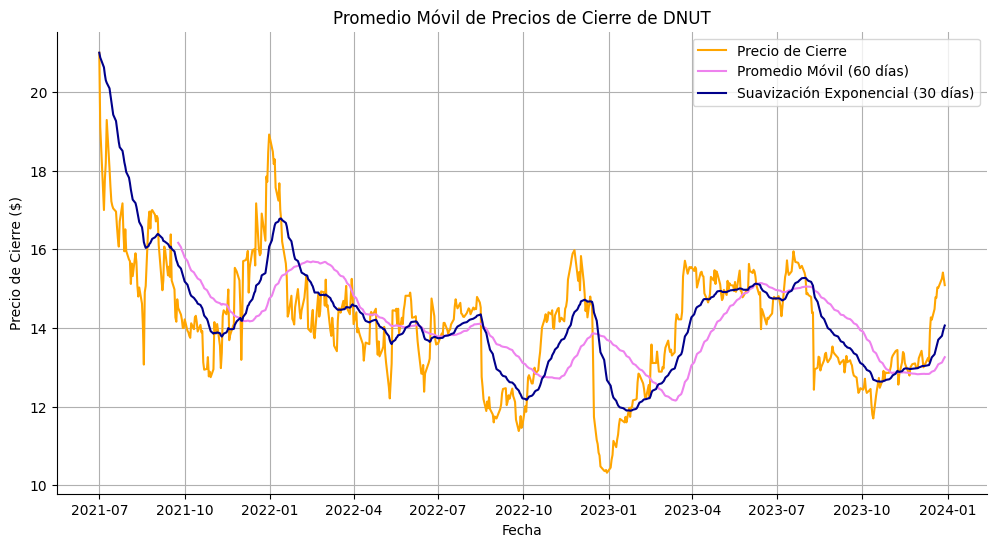

In [ ]:
import matplotlib.pyplot as plt
# Promedio Móvil Simple
ventana_sma = 60
df['SMA'] = df['DNUT_Close'].rolling(window=ventana_sma).mean()

# Promedio Móvil Exponencial
ventana_ses = 30
df['SES'] = df['DNUT_Close'].ewm(span=ventana_ses, adjust=False).mean()

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(df['DNUT_Close'], label='Precio de Cierre', color='orange')
plt.plot(df['SMA'], label=f'Promedio Móvil ({ventana_sma} días)', color='violet')
plt.plot(df['SES'], label=f'Suavización Exponencial ({ventana_ses} días)', color='darkblue')
plt.title('Promedio Móvil de Precios de Cierre de DNUT')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.grid()
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

Prueba de raíz unitaria (ADF o KPSS)

Hipótesis nula: La serie no es estacionaria (tiene raíz unitaria).

Hipótesis alternativa: La serie es estacionaria ( no tiene raíz unitaria).

In [ ]:
#Prueba de estacionariedad con ADF
nivel_de_significancia= 0.05
adf_test= adfuller(df['DNUT_Close'].dropna())
print('Estadistico ADF:', adf_test[0])
print('p-Value:', adf_test[1])
if adf_test[1] <= nivel_de_significancia:
  print('La serie es estacionaria (rechazamos la hipotesis nula)')
else:
  print('La serie no es estacionaria (aceptamos la hipotesis nula)')


Estadistico ADF: -5.0370898899750545
p-Value: 1.873242847446071e-05
La serie es estacionaria (rechazamos la hipotesis nula)


c) Realiza una regresión polinomial del grado que consideres necesario (a prueba y error). Grafica la serie de tiempo y la regresión polinomial.

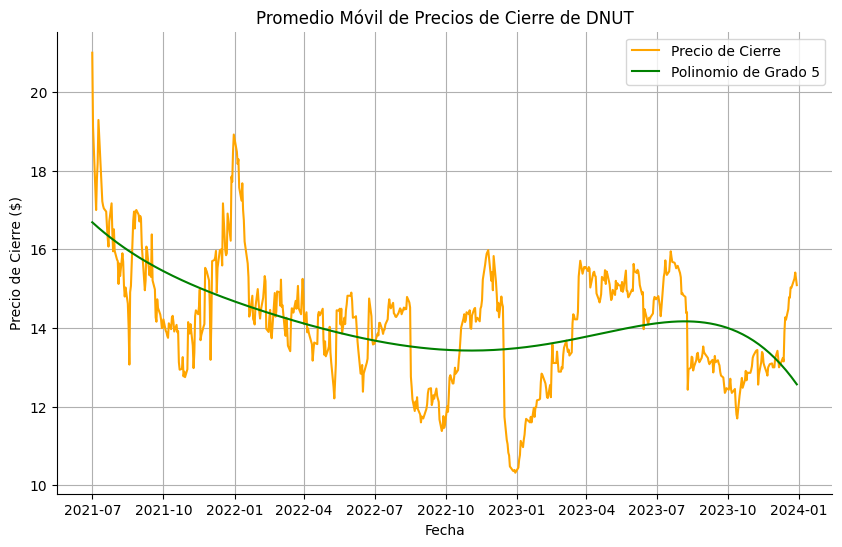

In [ ]:
#Convertir fechas numeros
df['Date'] = pd.to_datetime(df.index).map(pd.Timestamp.timestamp)
x= df['Date']
y= df ['DNUT_Close']
#Ajustar un modelo polinómico
#Regresión polinomial
grado= 5
modelo= Polynomial.fit(df['Date'], df['DNUT_Close'], deg = grado)
df['Poly_trend']= modelo(df['Date'])
df['Poly_resid']= df['DNUT_Close']- df['Poly_trend']
#Graficar
plt.figure(figsize=(10, 6))
plt.plot(df['DNUT_Close'], label='Precio de Cierre', color='orange')
plt.plot(df['Poly_trend'], label=f'Polinomio de Grado {grado}', color='green')
plt.title('Promedio Móvil de Precios de Cierre de DNUT')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.grid()
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

d) Gráfica los residuales del polinomio e intenta deducir una estacionalidad.

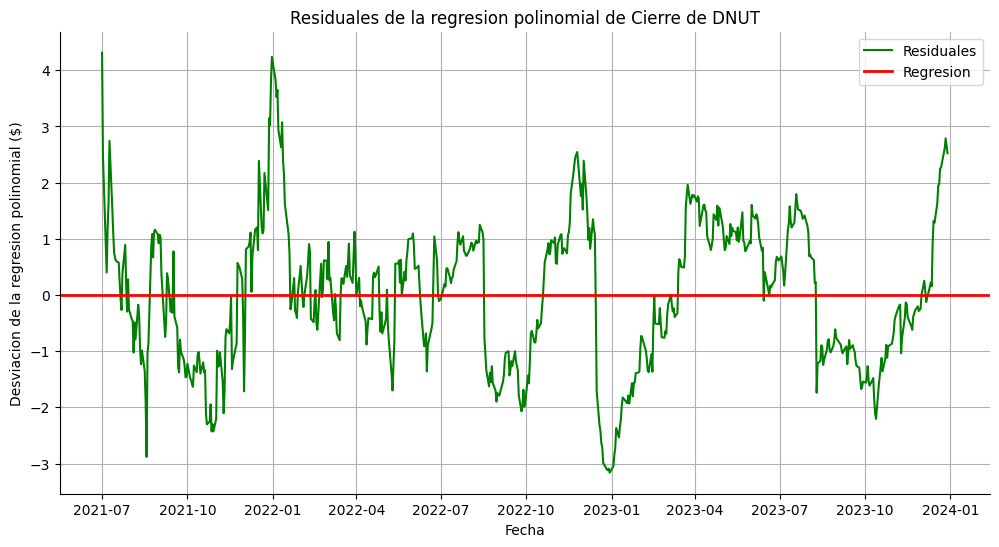

In [ ]:
#Graficar residuales
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['Poly_resid'], label='Residuales', color='green')
plt.axhline(0, color='red', label='Regresion',linestyle='solid', linewidth=2)  # Línea horizontal en el valor cero
plt.title('Residuales de la regresion polinomial de Cierre de DNUT')
plt.xlabel('Fecha')
plt.ylabel('Desviacion de la regresion polinomial ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

e) Descompón la serie de tiempo en sus componentes: tendencia, estacionalidad y ruido. Grafica la descomposición.

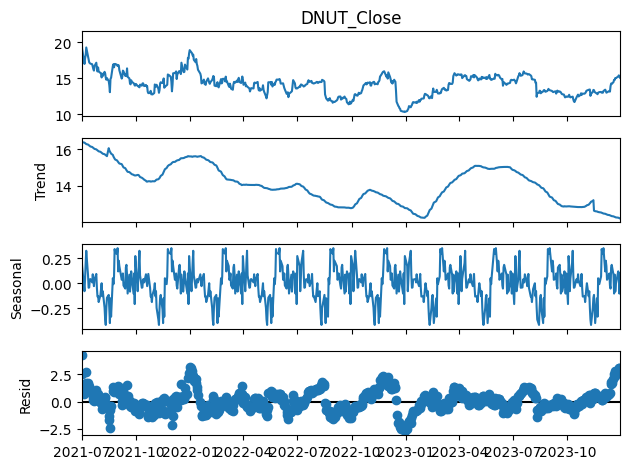

In [ ]:
descomposicion= sm.tsa.seasonal_decompose(
df['DNUT_Close'],
model= 'additive',
period= 63,
extrapolate_trend='freq' # Reemplazar estrapolate_trend=0 por extrapolate_trend='freq'
) #252 dias de negociacion al año
#Graficar
fig= descomposicion.plot()

plt.show()

f) Realiza una prueba de hipótesis para comprobar que se haya capturado correctamente la estacionalidad. Y realiza otra prueba de hipótesis para comprobar si la estacionalidad es significativa.

In [ ]:
#Prueba de estacionariedad: Prueba de Dickey-Fuller aumentada (ADF)
nivel_de_significancia = 0.05

# Realizar la prueba de Dickey-Fuller en la tendencia
adf_test = adfuller(descomposicion.resid.dropna())

print("Estadístico ADF:", adf_test[0])
print("P-valor:", adf_test[1])

if adf_test[1] <= nivel_de_significancia:
    print("La tendencia es estacionaria (rechazamos la hipótesis nula)")
else:
    print("La tendencia no es estacionaria (aceptamos la hipótesis nula)")#


Estadístico ADF: -6.0007232511747
P-valor: 1.6598761288340254e-07
La tendencia es estacionaria (rechazamos la hipótesis nula)


In [ ]:
from scipy.stats import ttest_rel

# Prueba t pareada para el efecto significativo de la estacionalidad

#Hipótesis nula (H₀): Ambas series son iguales.
#Hipótesis alternativa (H₁): Ambas series son diferentes


nivel_de_significancia = 0.05
tendencia = descomposicion.trend
tendencia_estacionalidad = descomposicion.seasonal + descomposicion.trend

# Eliminar valores NaN de ambas series
tendencia.dropna(inplace=True)
tendencia_estacionalidad.dropna(inplace=True)

# Realizar la prueba t pareada
t_stat, p_valor = ttest_rel(tendencia, tendencia_estacionalidad)

print("Estadístico t:", t_stat)
print("Valor p:", p_valor)
print("\n")

# Interpretación de los resultados
if p_valor < nivel_de_significancia:
    print("El valor p es menor que 0.05, por lo tanto, rechazamos la hipótesis nula.")
    print("Conclusión: La estacionalidad tiene un efecto significativo en la serie de tiempo.")
else:
    print("El valor p es mayor o igual que 0.05, por lo tanto, no podemos rechazar la hipótesis nula.")
    print("Conclusión: La estacionalidad no tiene un efecto significativo en la serie de tiempo.")

Estadístico t: -0.0471980911297965
Valor p: 0.9623703540506783


El valor p es mayor o igual que 0.05, por lo tanto, no podemos rechazar la hipótesis nula.
Conclusión: La estacionalidad no tiene un efecto significativo en la serie de tiempo.


g) Utilizando los componentes de la descomposición, realiza un gráfico que contenga la serie de tiempo real, la tendencia, la serie sin estacionalidad, y la serie sin ruido.

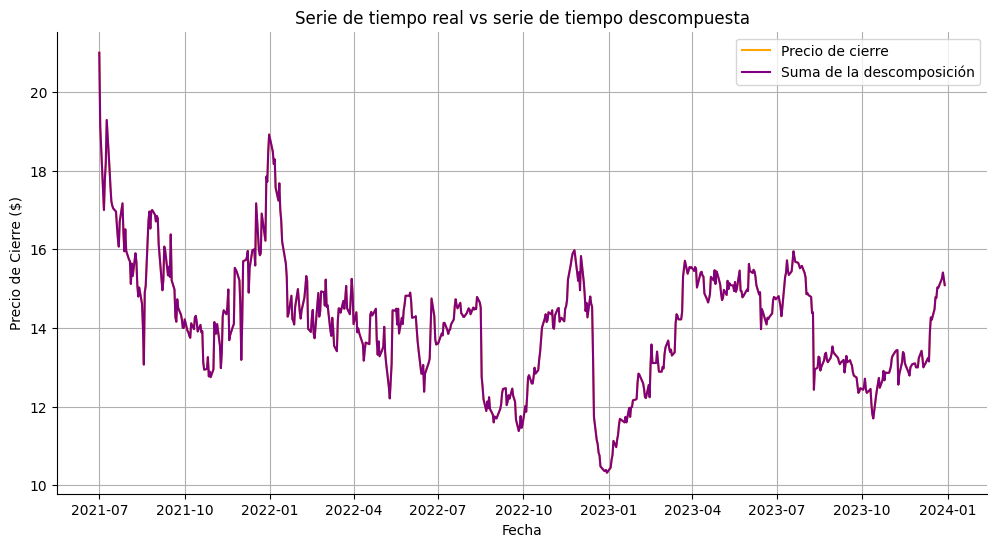

In [ ]:
# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['DNUT_Close'], label='Precio de cierre', color='orange')
plt.plot(descomposicion.trend + descomposicion.seasonal + descomposicion.resid, label=f'Suma de la descomposición', color='purple')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

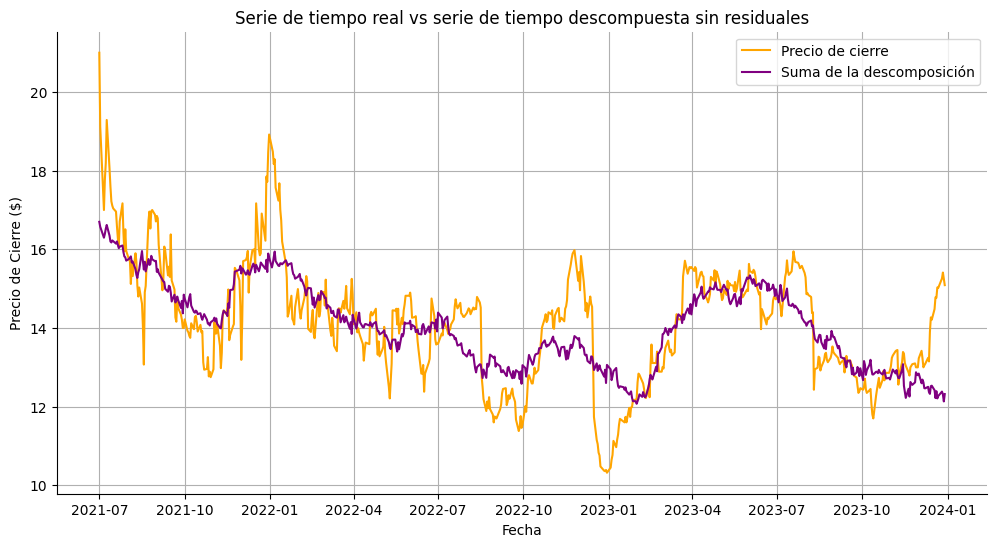

In [ ]:
# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['DNUT_Close'], label='Precio de cierre', color='orange')
plt.plot(descomposicion.trend + descomposicion.seasonal, label=f'Suma de la descomposición', color='purple')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta sin residuales')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

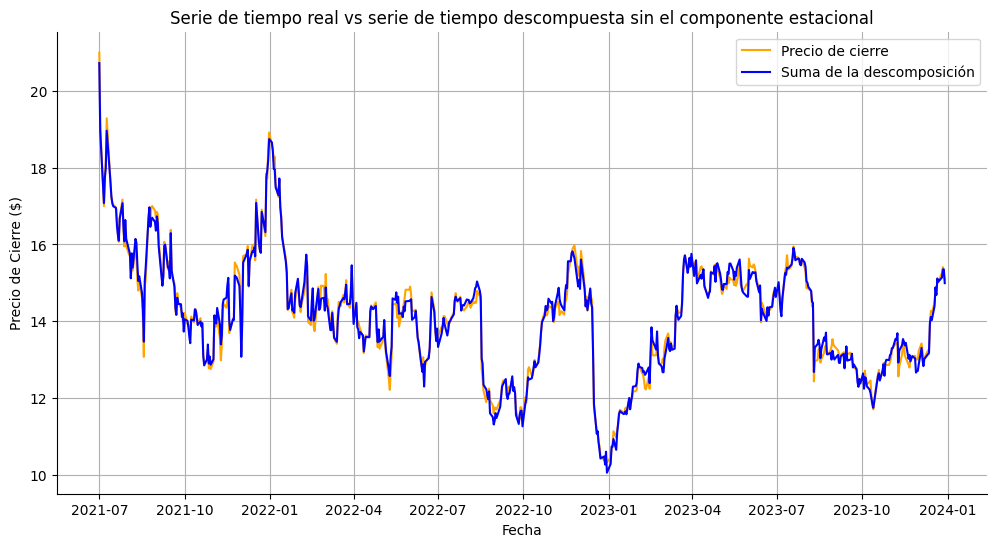

In [ ]:
# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['DNUT_Close'], label='Precio de cierre', color='orange')
plt.plot(descomposicion.trend + descomposicion.resid, label=f'Suma de la descomposición', color='blue')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta sin el componente estacional')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression # Changed 'skylearn' to 'sklearn'
from sklearn.model_selection import train_test_split # Assuming you meant 'train_test_split'
from scipy.stats import pearsonr
from statsmodels.tsa.stattools import adfuller
from numpy.polynomial.polynomial import Polynomial
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm

a) Obtén una serie de tiempo desde el primero de enero de 2015 hasta el primero de enero de 2018, cuya unidad de tiempo sea de un día y realiza las modificaciones necesarias para trabajarla.

In [ ]:
df=yf.download(
    tickers="SBUX",
    start="2021-01-01",
    end="2024-01-01",
    interval="1d",
    group_by=None,
    auto_adjust=False,
    actions=False,
)
df

[*********************100%***********************]  1 of 1 completed


Ticker                           SBUX                                      \
Price                            Open        High         Low       Close   
Date                                                                        
2021-01-04 00:00:00+00:00  107.660004  107.750000  102.139999  103.099998   
2021-01-05 00:00:00+00:00  102.919998  104.260002  102.800003  103.440002   
2021-01-06 00:00:00+00:00  102.989998  105.209999  102.910004  104.190002   
2021-01-07 00:00:00+00:00  104.489998  104.639999  102.949997  103.349998   
2021-01-08 00:00:00+00:00  103.860001  105.760002  103.419998  105.669998   
...                               ...         ...         ...         ...   
2023-12-22 00:00:00+00:00   94.889999   95.830002   94.339996   95.279999   
2023-12-26 00:00:00+00:00   95.339996   95.690002   94.959999   95.669998   
2023-12-27 00:00:00+00:00   95.690002   95.779999   94.790001   95.290001   
2023-12-28 00:00:00+00:00   95.500000   95.970001   95.110001   95.930000   
2023-12-29 00:00:00+00:00   95.879997   96.349998   95.349998   96.010002   

Ticker                                         
Price                      Adj Close   Volume  
Date                                           
2021-01-04 00:00:00+00:00  94.566483  8041500  
2021-01-05 00:00:00+00:00  94.878357  5721900  
2021-01-06 00:00:00+00:00  95.566277  5017200  
2021-01-07 00:00:00+00:00  94.795807  5057000  
2021-01-08 00:00:00+00:00  96.923767  5869700  
...                              ...      ...  
2023-12-22 00:00:00+00:00  92.857979  6360400  
2023-12-26 00:00:00+00:00  93.238060  3709500  
2023-12-27 00:00:00+00:00  92.867729  4959300  
2023-12-28 00:00:00+00:00  93.491455  4518300  
2023-12-29 00:00:00+00:00  93.569427  6134000  

[753 rows x 6 columns]

b) Realiza un análisis de cada serie de tiempo de manera independiente (análisis basado en el examen de práctica).

In [ ]:
# Paso 1: Mover 'Date' del índice a columna regular
df = df.reset_index()

# Paso 2: Aplanar el MultiIndex de las columnas, manteniendo 'Open', 'High', etc.
df.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df.columns.values]
df['Date'] = pd.to_datetime(df['Date']) #columna "Date"

df['Date'] = df['Date'].dt.date
df.set_index('Date', inplace=True)

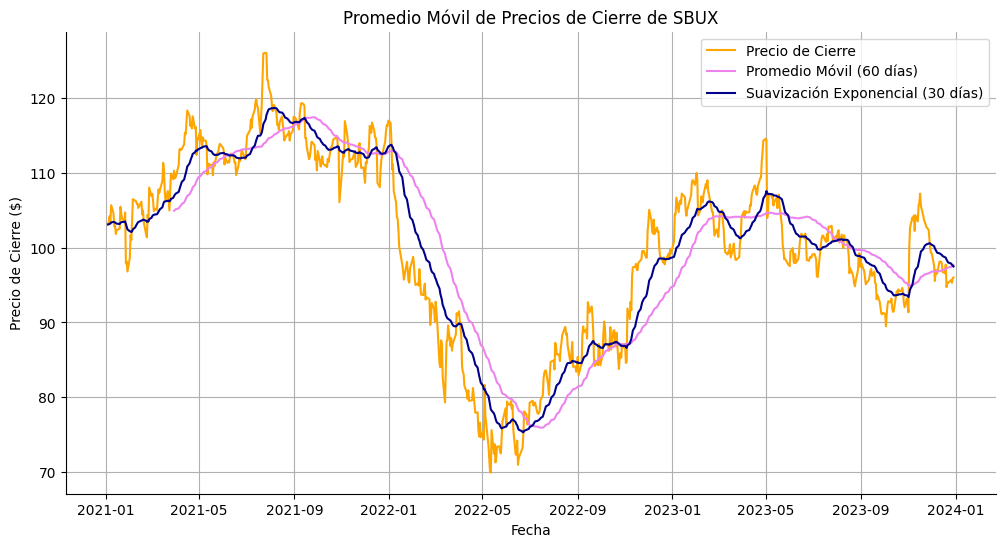

In [ ]:
import matplotlib.pyplot as plt
# Promedio Móvil Simple
ventana_sma = 60
df['SMA'] = df['SBUX_Close'].rolling(window=ventana_sma).mean()

# Promedio Móvil Exponencial
ventana_ses = 30
df['SES'] = df['SBUX_Close'].ewm(span=ventana_ses, adjust=False).mean()

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(df['SBUX_Close'], label='Precio de Cierre', color='orange')
plt.plot(df['SMA'], label=f'Promedio Móvil ({ventana_sma} días)', color='violet')
plt.plot(df['SES'], label=f'Suavización Exponencial ({ventana_ses} días)', color='darkblue')
plt.title('Promedio Móvil de Precios de Cierre de SBUX')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.grid()
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

Prueba de raíz unitaria (ADF o KPSS)

Hipótesis nula: La serie no es estacionaria (tiene raíz unitaria).

Hipótesis alternativa: La serie es estacionaria ( no tiene raíz unitaria).

In [ ]:
#Prueba de estacionariedad con ADF
nivel_de_significancia= 0.05
adf_test= adfuller(df['SBUX_Close'].dropna())
print('Estadistico ADF:', adf_test[0])
print('p-Value:', adf_test[1])
if adf_test[1] <= nivel_de_significancia:
  print('La serie es estacionaria (rechazamos la hipotesis nula)')
else:
  print('La serie no es estacionaria (aceptamos la hipotesis nula)')

Estadistico ADF: -1.8690303251823717
p-Value: 0.34676748935694496
La serie no es estacionaria (aceptamos la hipotesis nula)


c) Realiza una regresión polinomial del grado que consideres necesario (a prueba y error). Grafica la serie de tiempo y la regresión polinomial.

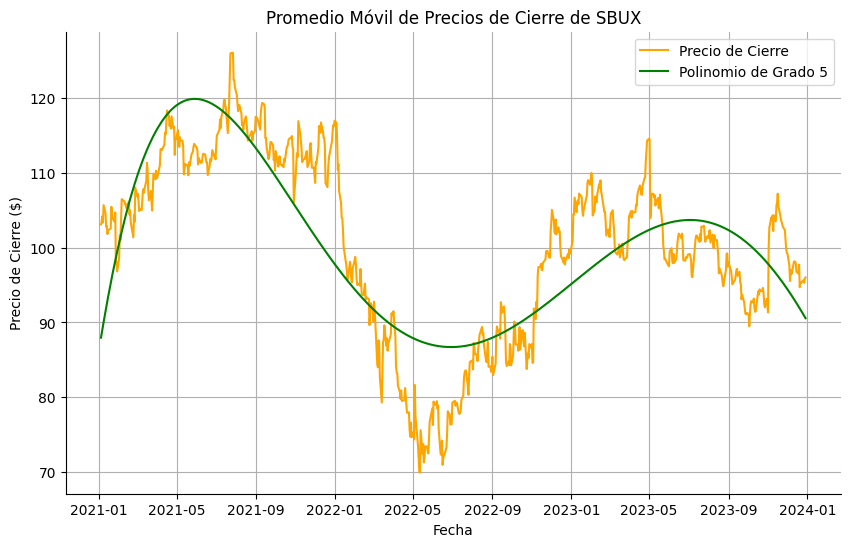

In [ ]:
#Convertir fechas numeros
df['Date'] = pd.to_datetime(df.index).map(pd.Timestamp.timestamp)
x= df['Date']
y= df ['SBUX_Close']
#Ajustar un modelo polinómico
#Regresión polinomial
grado= 5
modelo= Polynomial.fit(df['Date'], df['SBUX_Close'], deg = grado)
df['Poly_trend']= modelo(df['Date'])
df['Poly_resid']= df['SBUX_Close']- df['Poly_trend']
#Graficar
plt.figure(figsize=(10, 6))
plt.plot(df['SBUX_Close'], label='Precio de Cierre', color='orange')
plt.plot(df['Poly_trend'], label=f'Polinomio de Grado {grado}', color='green')
plt.title('Promedio Móvil de Precios de Cierre de SBUX')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.grid()
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

d) Gráfica los residuales del polinomio e intenta deducir una estacionalidad.

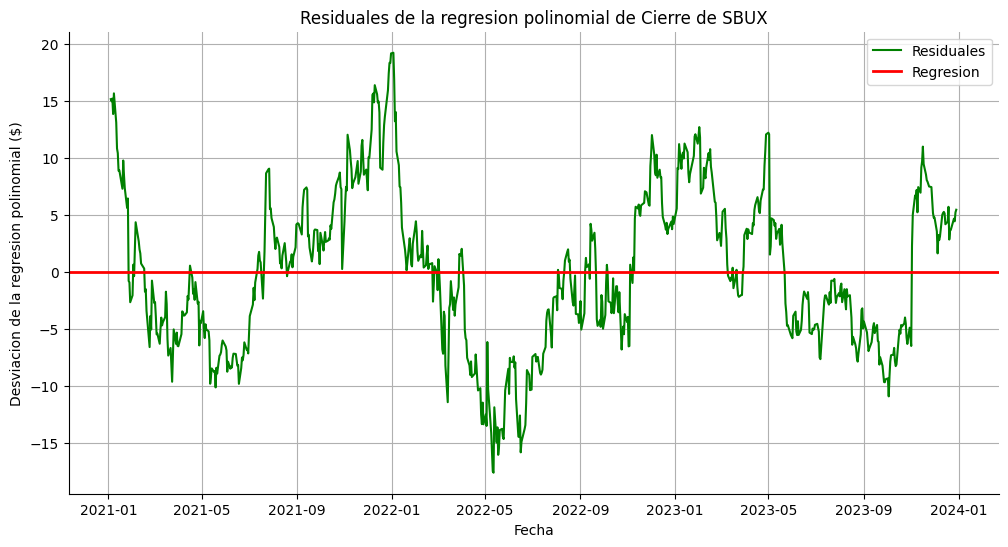

In [ ]:
#Graficar residuales
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['Poly_resid'], label='Residuales', color='green')
plt.axhline(0, color='red', label='Regresion',linestyle='solid', linewidth=2)  # Línea horizontal en el valor cero
plt.title('Residuales de la regresion polinomial de Cierre de SBUX')
plt.xlabel('Fecha')
plt.ylabel('Desviacion de la regresion polinomial ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

e) Descompón la serie de tiempo en sus componentes: tendencia, estacionalidad y ruido. Grafica la descomposición.


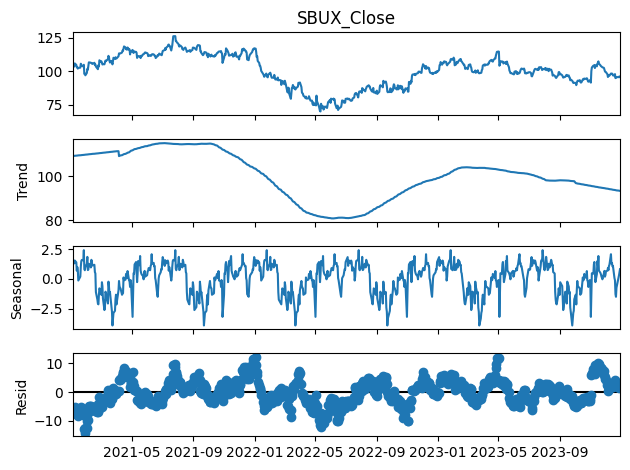

In [ ]:
descomposicion= sm.tsa.seasonal_decompose(
df['SBUX_Close'],
model= 'additive',
period= 126,
extrapolate_trend='freq' # Reemplazar estrapolate_trend=0 por extrapolate_trend='freq'
) #252 dias de negociacion al año
#Graficar
fig= descomposicion.plot()

plt.show()

f) Realiza una prueba de hipótesis para comprobar que se haya capturado correctamente la estacionalidad. Y realiza otra prueba de hipótesis para comprobar si la estacionalidad es significativa.

In [ ]:
#Prueba de estacionariedad: Prueba de Dickey-Fuller aumentada (ADF)
nivel_de_significancia = 0.05

# Realizar la prueba de Dickey-Fuller en la tendencia
adf_test = adfuller(descomposicion.resid.dropna())

print("Estadístico ADF:", adf_test[0])
print("P-valor:", adf_test[1])

if adf_test[1] <= nivel_de_significancia:
    print("La tendencia es estacionaria (rechazamos la hipótesis nula)")
else:
    print("La tendencia no es estacionaria (aceptamos la hipótesis nula)")#


Estadístico ADF: -4.8563898379654695
P-valor: 4.237183754493497e-05
La tendencia es estacionaria (rechazamos la hipótesis nula)


In [ ]:
from scipy.stats import ttest_rel

# Prueba t pareada para el efecto significativo de la estacionalidad

#Hipótesis nula (H₀): Ambas series son iguales.
#Hipótesis alternativa (H₁): Ambas series son diferentes


nivel_de_significancia = 0.05
tendencia = descomposicion.trend
tendencia_estacionalidad = descomposicion.seasonal + descomposicion.trend

# Eliminar valores NaN de ambas series
tendencia.dropna(inplace=True)
tendencia_estacionalidad.dropna(inplace=True)

# Realizar la prueba t pareada
t_stat, p_valor = ttest_rel(tendencia, tendencia_estacionalidad)

print("Estadístico t:", t_stat)
print("Valor p:", p_valor)
print("\n")

# Interpretación de los resultados
if p_valor < nivel_de_significancia:
    print("El valor p es menor que 0.05, por lo tanto, rechazamos la hipótesis nula.")
    print("Conclusión: La estacionalidad tiene un efecto significativo en la serie de tiempo.")
else:
    print("El valor p es mayor o igual que 0.05, por lo tanto, no podemos rechazar la hipótesis nula.")
    print("Conclusión: La estacionalidad no tiene un efecto significativo en la serie de tiempo.")

Estadístico t: 0.11154398046362798
Valor p: 0.9112147566694819


El valor p es mayor o igual que 0.05, por lo tanto, no podemos rechazar la hipótesis nula.
Conclusión: La estacionalidad no tiene un efecto significativo en la serie de tiempo.


g) Utilizando los componentes de la descomposición, realiza un gráfico que contenga la serie de tiempo real, la tendencia, la serie sin estacionalidad, y la serie sin ruido.

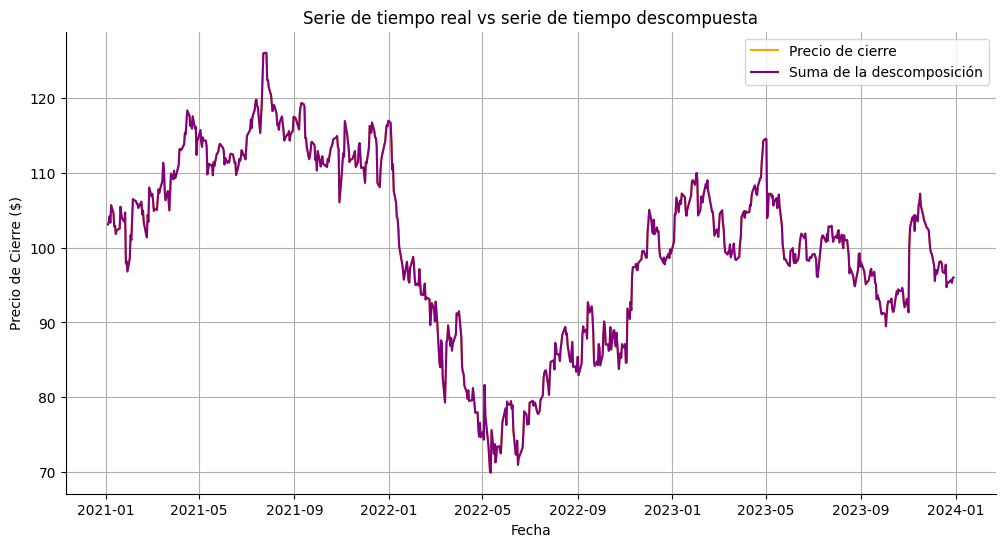

In [ ]:
# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['SBUX_Close'], label='Precio de cierre', color='orange')
plt.plot(descomposicion.trend + descomposicion.seasonal + descomposicion.resid, label=f'Suma de la descomposición', color='purple')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

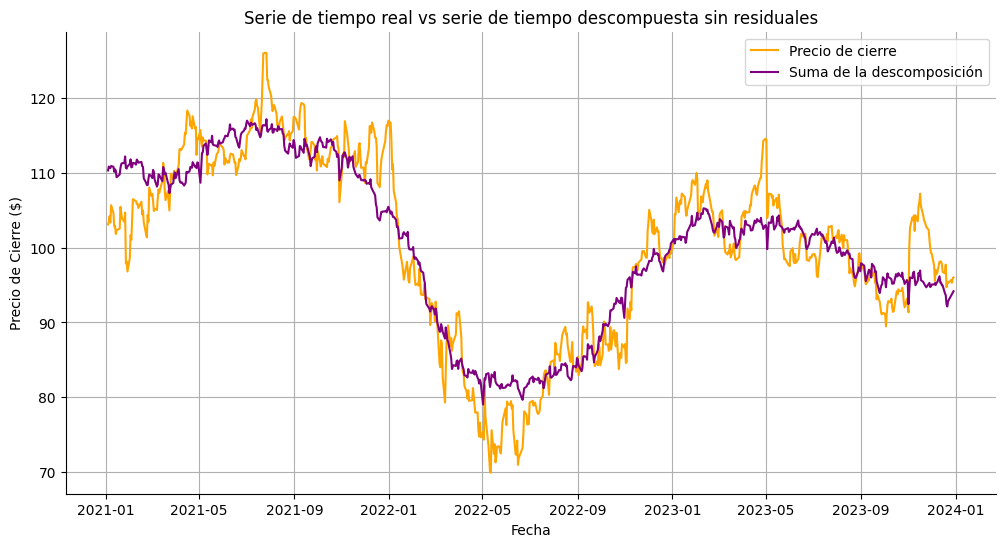

In [ ]:
# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['SBUX_Close'], label='Precio de cierre', color='orange')
plt.plot(descomposicion.trend + descomposicion.seasonal, label=f'Suma de la descomposición', color='purple')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta sin residuales')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

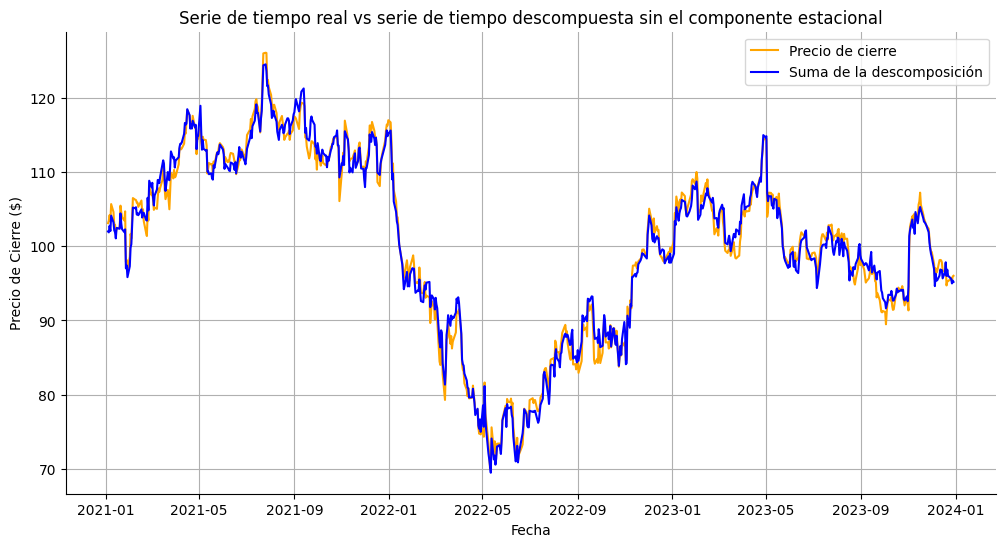

In [ ]:
# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['SBUX_Close'], label='Precio de cierre', color='orange')
plt.plot(descomposicion.trend + descomposicion.resid, label=f'Suma de la descomposición', color='blue')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta sin el componente estacional')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

C) Investiga el concepto de "causalidad de Granger" y aplícalo a las series de tiempo

In [ ]:
# Obtener datos de acciones
df = yf.download(
    tickers=['DNUT', 'SBUX'],            # tickers: AAPL: Apple, TSLA: Tesla, etc.
    start='2021-01-01',        # Fecha de inicio
    end='2024-01-01',          # Fecha de fin
    interval='1d',             # Intervalo de tiempo (1 día)
    group_by=None,             # Agrupar por ticker
    auto_adjust=False,         # ajusta automáticamente los precios de cierre, apertura, máximo y mínimo para tener en cuenta los dividendos y divisiones de acciones.
    actions=False,             # Si se establece en True, incluye datos sobre acciones, como dividendos y divisiones.
    )
df = df.reset_index()

df.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df.columns.values]
df['Date'] = pd.to_datetime(df['Date'])

df['Date'] = df['Date'].dt.date
df.set_index('Date', inplace=True)


df

[*********************100%***********************]  2 of 2 completed


,SBUX_Open,SBUX_High,SBUX_Low,SBUX_Close,SBUX_Adj Close,SBUX_Volume,DNUT_Open,DNUT_High,DNUT_Low,DNUT_Close,DNUT_Adj Close,DNUT_Volume
Date,,,,,,,,,,,,
2021-01-04,107.660004,107.750000,102.139999,103.099998,94.566483,8041500,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,102.919998,104.260002,102.800003,103.440002,94.878357,5721900,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-06,102.989998,105.209999,102.910004,104.190002,95.566277,5017200,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-07,104.489998,104.639999,102.949997,103.349998,94.795807,5057000,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-08,103.860001,105.760002,103.419998,105.669998,96.923767,5869700,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,94.889999,95.830002,94.339996,95.279999,92.857979,6360400,15.08,15.11,14.94,15.02,14.850476,647900.0
2023-12-26,95.339996,95.690002,94.959999,95.669998,93.238060,3709500,15.01,15.33,14.97,15.26,15.087768,517600.0
2023-12-27,95.690002,95.779999,94.790001,95.290001,92.867729,4959300,15.30,15.41,15.22,15.41,15.236074,531200.0


In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

# Hipótesis Nula (H₀): La serie X no causa en el sentido de Granger a la serie Y.
# Hipótesis Alternativa (H₁): La serie X causa en el sentido de Granger a la serie Y.

# Definir el número máximo de rezagos para la prueba
max_lags = 5

# Eliminar o imputar valores NaN en el DataFrame
# Opción 1: Eliminar filas con NaN
# df_cleaned = df[['DNUT_Close', 'SBUX_Close']].dropna()
# Opción 2: Imputar valores NaN (por ejemplo, con la media)
df_cleaned = df[['DNUT_Close', 'SBUX_Close']].fillna(df[['DNUT_Close', 'SBUX_Close']].mean())

# Realizar la prueba de causalidad de Granger con el DataFrame limpio
resultado = grangercausalitytests(df_cleaned, max_lags, verbose=True)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.9880  , p=0.1590  , df_denom=749, df_num=1
ssr based chi2 test:   chi2=1.9960  , p=0.1577  , df=1
likelihood ratio test: chi2=1.9933  , p=0.1580  , df=1
parameter F test:         F=1.9880  , p=0.1590  , df_denom=749, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.5332  , p=0.2165  , df_denom=746, df_num=2
ssr based chi2 test:   chi2=3.0869  , p=0.2136  , df=2
likelihood ratio test: chi2=3.0806  , p=0.2143  , df=2
parameter F test:         F=1.5332  , p=0.2165  , df_denom=746, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.0869  , p=0.3538  , df_denom=743, df_num=3
ssr based chi2 test:   chi2=3.2915  , p=0.3488  , df=3
likelihood ratio test: chi2=3.2843  , p=0.3498  , df=3
parameter F test:         F=1.0869  , p=0.3538  , df_denom=743, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.0523  , p=0.3792  

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfwjbgpft/30jnywp1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfwjbgpft/e1kamwfd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14972', 'data', 'file=/tmp/tmpfwjbgpft/30jnywp1.json', 'init=/tmp/tmpfwjbgpft/e1kamwfd.json', 'output', 'file=/tmp/tmpfwjbgpft/prophet_modeli4pzill5/prophet_model-20241122202204.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:22:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:22:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


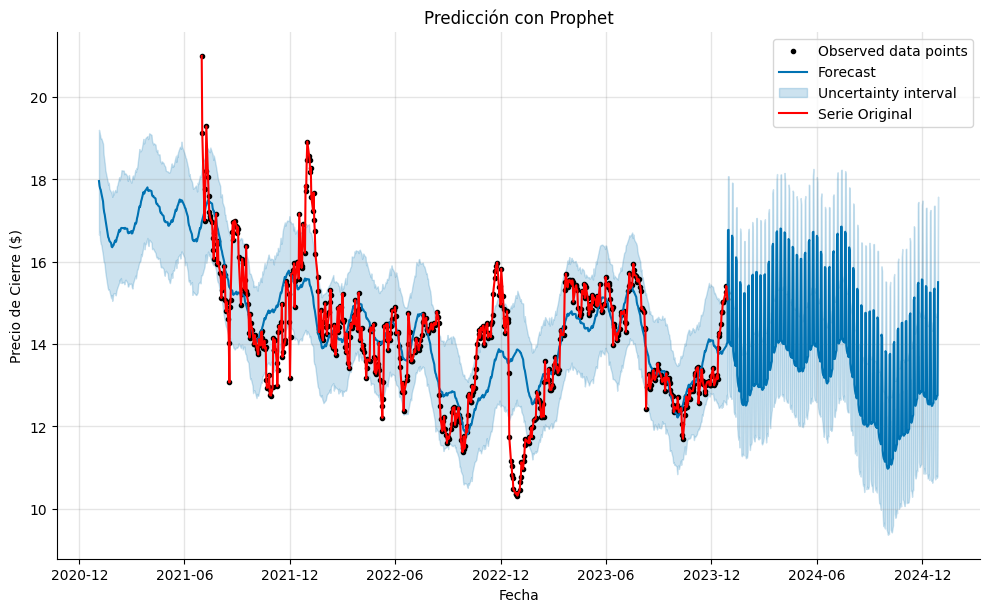

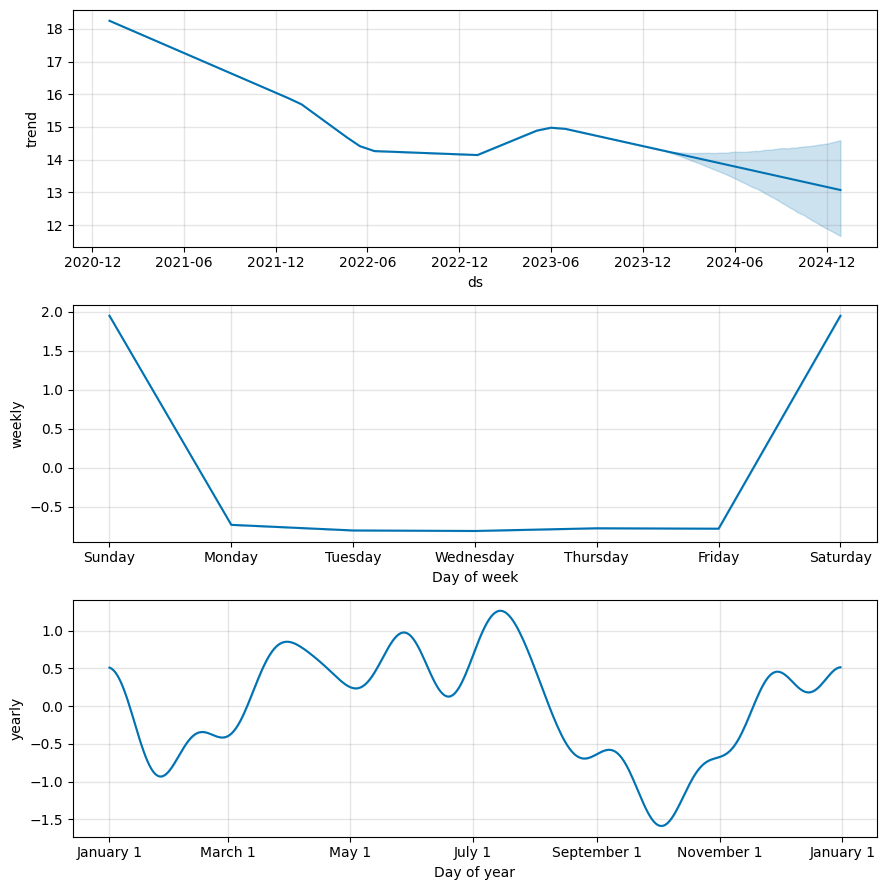

In [ ]:
from prophet import Prophet

# Crear el modelo y ajustarlo
modelo = Prophet()
modelo.fit(df['DNUT_Close'].reset_index().rename(columns={'Date': 'ds', 'DNUT_Close': 'y'}))

# Predicción para los próximos 365 días
futuro = modelo.make_future_dataframe(periods=365)
predicciones = modelo.predict(futuro)

# Visualizar las predicciones
fig = modelo.plot(predicciones)
plt.plot(dffrom prophet import Prophet

# Crear el modelo y ajustarlo
modelo = Prophet()
modelo.fit(df['AAPL_Close'].reset_index().rename(columns={'Date': 'ds', 'AAPL_Close': 'y'}))

# Predicción para los próximos 365 días
futuro = modelo.make_future_dataframe(periods=365)
predicciones = modelo.predict(futuro)

# Visualizar las predicciones
fig = modelo.plot(predicciones)
plt.plot(df2['AAPL_Close'], label='Serie Original', color='red')
plt.xlabel('Fecha')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Predicción con Prophet')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
fig = modelo.plot_components(predicciones)['DNUT_Close'], label='Serie Original', color='red')
plt.xlabel('Fecha')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Predicción con Prophet')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
fig = modelo.plot_components(predicciones)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfwjbgpft/w6zslir4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfwjbgpft/nic_4lgt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76212', 'data', 'file=/tmp/tmpfwjbgpft/w6zslir4.json', 'init=/tmp/tmpfwjbgpft/nic_4lgt.json', 'output', 'file=/tmp/tmpfwjbgpft/prophet_modelszglzoyk/prophet_model-20241122202513.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:25:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:25:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


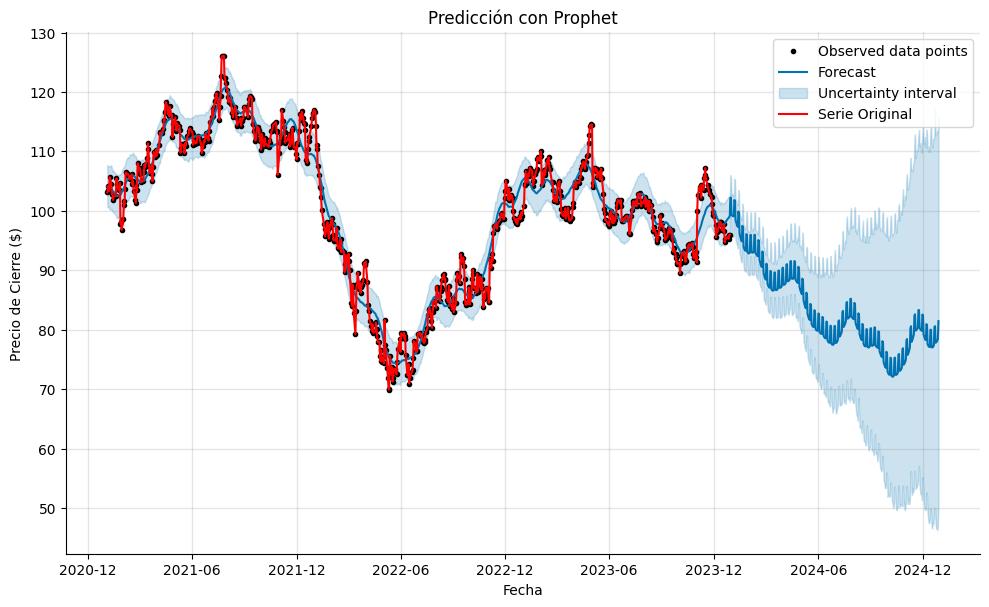

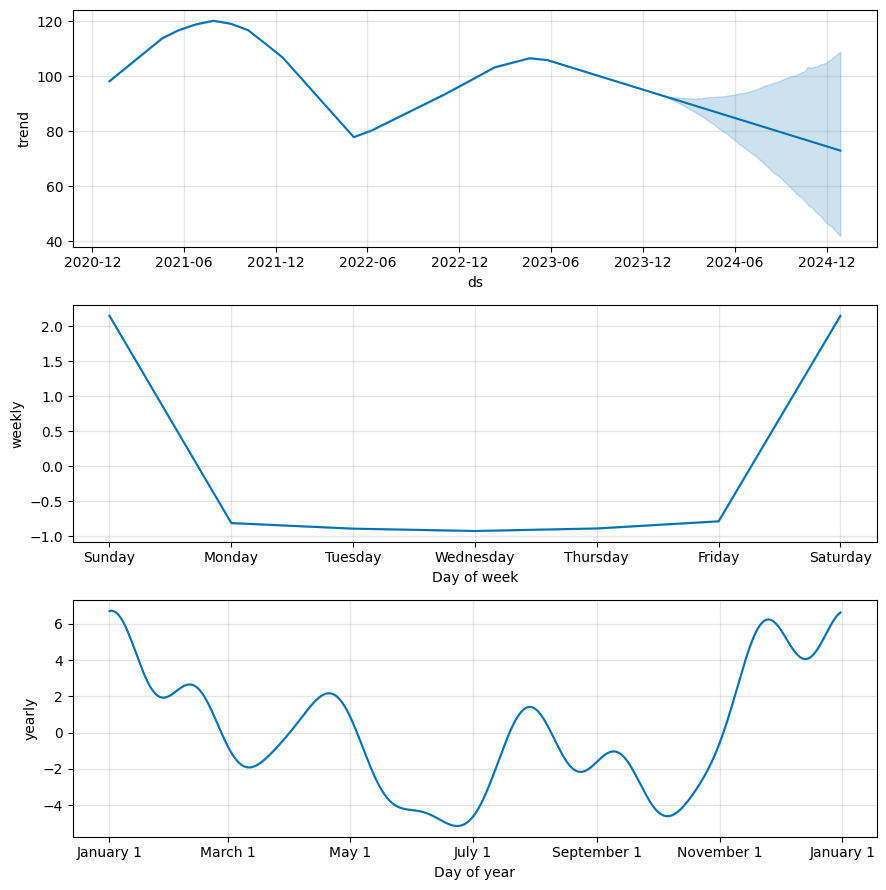

In [ ]:
from prophet import Prophet

# Crear el modelo y ajustarlo
modelo = Prophet()
modelo.fit(df['SBUX_Close'].reset_index().rename(columns={'Date': 'ds', 'SBUX_Close': 'y'}))

# Predicción para los próximos 365 días
futuro = modelo.make_future_dataframe(periods=365)
predicciones = modelo.predict(futuro)

# Visualizar las predicciones
fig = modelo.plot(predicciones)
plt.plot(df['SBUX_Close'], label='Serie Original', color='red')
plt.xlabel('Fecha')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Predicción con Prophet')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
fig = modelo.plot_components(predicciones)

*RESULTADOS*

En el inciso A) descargamos lo datos para elaborar la analisis de serie de tiempo con la funcion y.finance en este caso KRISPY KREME (DNUT) Y hacemos lo mismo con STARBUCKS(SBUX). Es importante recordar que este paso es fundamental pues es el principio de todo para desarrolar nuestro trabajo.
Luego, graficamos el cierre de precios de ambas variables (DNUT y SBUX), en las cuales podemos observar y analizar el comportamiento histórico de los activos (principalmente) y en casos de aplicación mas realista tomar decisiones más informadas y comunicar ciertas situaciones od descubrimientos  de manera clara y efectiva.

Después aplicamos la prueba ADF para determinar si exite o no estacionalidad en los datos que si comparamos una con la otra en DNUT si esta presente, mientras que en SBUX no es de la misma forma; lo cual quiere decir que como su denominacion lo dice que tanto se mantienen ciertos datos en un determinado periodo dependiendo del ciclo economico y en ciertas estaciones del año.

La regresión polinomial como sabemos nos ayuda a modelar / identificar tendencias que no sean lineales en los datos que estamos aplicando el analisis de la serie de tiempo, lo cual nos proprociona mayor estabilidad y flexibilidad para poder interpretarlos de mejor forma.

La graficación de residuales nos ayuda a ver a más detalle la exitencia o no existencia de estacionalidad en nuestros datos, por lo cual nos otorga un analisis mas veridico de este componente.
Al momento de descomponer nuestra serie de tiempo refleja cada uno de los componentes a mas detalle (tendencia, residuales, estacionalidad) esto para poder observar aquellos datos que no estan directamente fáciles de percibir. Esto se aplica a amabas series, con un periodo de tiempo de 126 dias, recordando que un 1 año de negociación = 252, en este caso se quizó interpretar a 126 dias que corresponde a 1 semestre para poder tener mejor visualización de nuestros resulatdos al aplicar la descomposición.

Después se realizó una prueba de hipótesis para comprobar que se haya capturado correctamente la estacionalidad y se llevó  a cabo  otra prueba de hipótesis para comprobar si la estacionalidad es significativa.

Al finalizar la aplicación de ambas pruebas, se compara la serie real con la serie obtenida fianlmente para poder deducir las diferencias presentes en cada una.

Para poder concluir se aplica el test de causalidad de granger y el modelo Prophet.El primero, respectivamente hablando nos ayuda a determinar si DNUT precede a SBUX.Y por ultimo el segundo modelo, respectivamente nos ayuda a descomponer aun mas a detalle cada una de las series temporales para determinar que tannto se ven afectadas por ciertos dias en el año, como festivos, tendencias a largo plazo y a corto plazo.


***CONCLUSIÓN***

El análisis de series de tiempo nos proporciona distintas herramientas para entender cómo cambian los datos a lo largo del tiempo, identificando  ciertos patrones que se repiten y realizando predicciones más concretas. Tomando en cuenta lo siguiente:

Tendencia: Cambios generales a largo plazo (como si algo está creciendo o disminuyendo).

Estacionalidad: Variaciones que se repiten en intervalos regulares (como las ventas altas en diciembre).

La regresión polinomial sirve para ajustar datos que no siguen una línea recta, mientras que la descomposición separa cada parte (tendencia, estacionalidad y ruido) para analizarlas por separado.

Dicho de una manera mas sencilla, estas herramientas hacen más fáci interpretar datos del pasado, entender por qué cambian y tomar mejores decisiones futuras basadas en esa información y en el comportamiento observado en el análisis de las series de tiempo.